In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy as np
import pickle
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

# Load one training sample

In [3]:
train_path = "./train/train"
# The glob module finds all the pathnames matching a specified pattern
train_pkl_lst = glob(os.path.join(train_path, '*'))
with open(train_pkl_lst[0], 'rb') as f:
    training_sample = pickle.load(f)

In [4]:
# There are at most 60 agents/vehicles in a scene
# 'agent_id' is the track id for the agent to be predicted in this scene
training_sample.keys()

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'p_out', 'v_out', 'track_id'])

In [5]:
training_sample['agent_id']

'00000000-0000-0000-0000-000000044289'

In [6]:
training_sample['p_in'].shape

(60, 19, 2)

In [7]:
training_sample['lane'].shape

(216, 2)

In [18]:
scene = training_sample
# the index of agent to be predicted 
pred_id = np.where(scene["track_id"] == scene['agent_id'])[0][0]
# print(pred_id, "pred_id")
# print(scene['car_mask'], "scene[car_mask]", scene['car_mask'].shape)
# input: p_in & v_in; output: p_out
p_in_raw = scene['p_in'][pred_id]
p_out_raw = scene['p_out'][pred_id]
v_in_raw = scene['v_in'][pred_id]
v_out_raw = scene['v_out'][pred_id]
lane_scene = scene['lane']
# print(p_in_raw.shape,p_out_raw.shape,v_in_raw.shape,v_out_raw.shape,lane_scene.shape)

# Normalization
min_vecs = np.min(lane_scene, axis = 0)
max_vecs = np.max(lane_scene, axis = 0)
# print(min_vecs,max_vecs)

# Normalize by vectors
p_in_normalized = (p_in_raw - min_vecs)/(max_vecs - min_vecs)
p_out_normalized = (p_out_raw - min_vecs)/(max_vecs - min_vecs)
print("hello?????",p_in_raw)#, p_in_normalized,p_out_normalized)
v_in_normalized = v_in_raw / np.linalg.norm(v_in_raw, axis=1, keepdims=True)
# v_out_normalized = v_out_raw / np.linalg.norm(v_out_raw, axis=1, keepdims=True)
inp = np.dstack([p_in_normalized,v_in_normalized])

9 pred_id
(19, 2) (30, 2) (19, 2) (30, 2) (216, 2)
[2134.004   687.9857] [2254.4216  780.    ]
hello????? [[2194.03710938  733.11071777]
 [2194.2956543   733.33532715]
 [2194.57397461  733.53363037]
 [2194.8659668   733.78985596]
 [2195.23413086  734.0065918 ]
 [2195.53588867  734.32733154]
 [2195.40869141  734.21295166]
 [2195.73583984  734.58843994]
 [2196.07226562  734.81921387]
 [2196.50756836  735.14807129]
 [2196.85131836  735.47894287]
 [2197.05371094  735.69586182]
 [2197.48681641  736.04772949]
 [2198.05639648  736.47314453]
 [2198.34423828  736.6842041 ]
 [2198.76611328  737.05072021]
 [2199.31713867  737.50360107]
 [2199.67895508  737.82287598]
 [2200.17675781  738.21405029]]


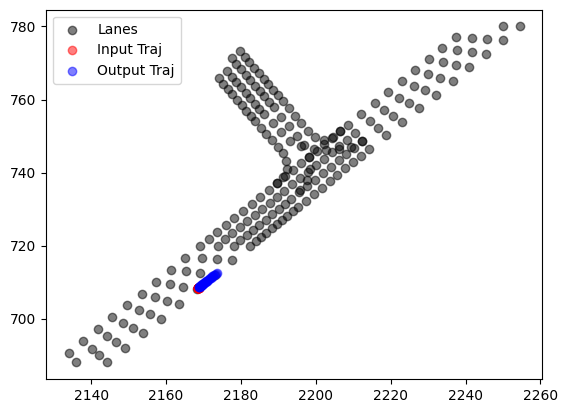

In [22]:
plt.scatter(training_sample['lane'][:,0], training_sample['lane'][:,1], alpha=0.5, label = "Lanes", color = "black")

plt.scatter(training_sample['p_in'][1,:,0], training_sample['p_in'][1,:,1], alpha=0.5, label = "Input Traj", color = "red")
plt.scatter(training_sample['p_out'][1,:,0], training_sample['p_out'][1,:,1], alpha=0.5, label = "Output Traj", color = "blue")
       
plt.legend()
# plt.xticks([])
# plt.yticks([])
plt.show()

# Examining the submission format

In [14]:
test_path = "./val_in/val_in/"
test_pkl_list = glob(os.path.join(test_path, '*'))
test_pkl_list.sort()
with open(test_pkl_list[0], 'rb') as f:
    test_sample = pickle.load(f)

In [15]:
test_sample.keys()

dict_keys(['city', 'lane', 'lane_norm', 'scene_idx', 'agent_id', 'car_mask', 'p_in', 'v_in', 'track_id'])

In [18]:
test_sample['p_in'].shape

(60, 19, 2)

In [19]:
# Submission Files: a sample submission file in the correct format
# 30-step ahead predictions of positions. 
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
0,10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
predictions = np.random.randn(3200, 60)

In [21]:
sub_df = pd.DataFrame(np.c_[sample_sub["ID"], predictions], columns=[np.r_[["ID"], ["v" + str(i) for i in range(1,61)]]])
sub_df.to_csv('test_submission.csv', index=None)